Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

In [1]:
# Импорт пакетов
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Инициализация нулевого сида
np.random.seed(0)


In [2]:
# Импорт датасетов (тренировочный датасет вроде не тот, что нужен, но это хоть что то. Другой скачать не могу.)
train_iris = pd.read_csv("../../../Datasets/iris.csv")
test_iris  = pd.read_csv("../../../Datasets/test_iris.csv")

In [3]:
# Проверим, что с датасетами все в порядке
# Взглянем на их примерное содержимое
print(train_iris.head())
print(test_iris.head())

   Unnamed: 0  sepal length  sepal width  petal length  petal width  species
0           0           5.1          3.5           1.4          0.2        0
1           1           4.9          3.0           1.4          0.2        0
2           2           4.7          3.2           1.3          0.2        0
3           3           4.6          3.1           1.5          0.2        0
4           4           5.0          3.6           1.4          0.2        0
   Unnamed: 0  sepal length  sepal width  petal length  petal width  species
0         114           5.8          2.8           5.1          2.4        2
1          70           5.9          3.2           4.8          1.8        1
2         138           6.0          3.0           4.8          1.8        2
3          59           5.2          2.7           3.9          1.4        1
4          44           5.1          3.8           1.9          0.4        0


In [4]:
# Также проверим их на наличие нулевых значений
print(train_iris.isnull().sum())
print(test_iris.isnull().sum())

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64
Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64


In [5]:
# Создадим датафрейм, в которые будем записывать значения
scores_data = pd.DataFrame()

# Создадим датафреймы, с которыми будем работать
X_train = train_iris.drop(["Unnamed: 0", "species"], axis=1)
X_test  = test_iris.drop(["Unnamed: 0", "species"], axis=1)

y_train = train_iris.species
y_test  = test_iris.species

print(X_train.head(), X_test.head(), y_train.head(), y_test.head(), sep="\n")

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   sepal length  sepal width  petal length  petal width
0           5.8          2.8           5.1          2.4
1           5.9          3.2           4.8          1.8
2           6.0          3.0           4.8          1.8
3           5.2          2.7           3.9          1.4
4           5.1          3.8           1.9          0.4
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64
0    2
1    1
2    2
3    1
4    0
Name: species, dtype: int64


In [6]:
# Обучение
from sklearn.model_selection import cross_val_score
max_depth_range = range(1, 100)

for max_depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score  = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp = pd.DataFrame({
        "depth": [max_depth],
        "train_score": [train_score],
        "test_score": [test_score],
        "cross_val_score": [mean_cross_val_score]
    })

    scores_data = scores_data.append(temp)

scores_data.head()

/tmp/ipykernel_7769/4032189686.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp)
/tmp/ipykernel_7769/4032189686.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp)
/tmp/ipykernel_7769/4032189686.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp)
/tmp/ipykernel_7769/4032189686.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp)
/tmp/ipykernel_7769/4032189686.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

,depth,train_score,test_score,cross_val_score
0,1,0.666667,0.70,0.666667
0,2,0.960000,0.94,0.933333
0,3,0.973333,0.94,0.960000
0,4,0.993333,0.98,0.953333
0,5,1.000000,1.00,0.953333


In [10]:
scores_melt = pd.melt(
    scores_data,
    id_vars=["depth"],
    value_vars=["train_score", "test_score", "cross_val_score"],
    value_name="score",
    var_name="type"
)

scores_melt.head(20)

,depth,type,score
0,1,train_score,0.666667
1,2,train_score,0.960000
2,3,train_score,0.973333
3,4,train_score,0.993333
4,5,train_score,1.000000
5,6,train_score,1.000000
6,7,train_score,1.000000
7,8,train_score,1.000000
8,9,train_score,1.000000
9,10,train_score,1.000000


<Axes: xlabel='depth', ylabel='score'>

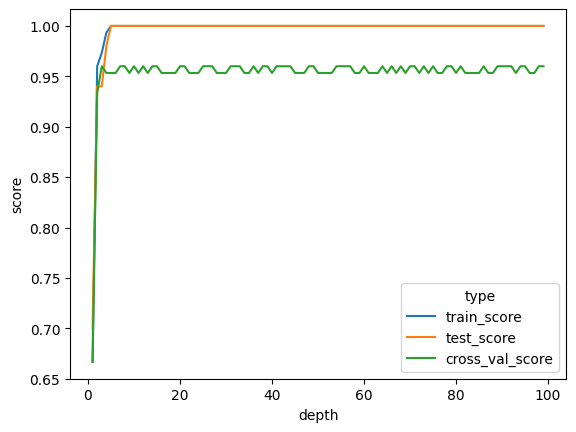

In [11]:
# Нарисуем на графике
sns.lineplot(
    scores_melt,
    x="depth",
    y="score",
    hue="type"
)